# Estatisticas e visualizações

In [13]:
import pandas as pd
import numpy as np

In [14]:
# carregando o df pré processado

df = pd.read_csv('pre_processado_completo.csv', parse_dates=['date'])
df.head()

,city,state,country,shape,duration_m,comments,latitude,longitude,date
0,san marcos,tx,us,cylinder,45.000000,This event took place in early fall around 194...,29.883056,-97.941111,1949-10-10
1,edna,tx,us,circle,0.333333,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956-10-10
2,kaneohe,hi,us,light,15.000000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960-10-10
3,bristol,tn,us,sphere,5.000000,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961-10-10
4,norwalk,ct,us,disk,20.000000,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965-10-10


## Analisando a quantidade de avistamentos por países

In [15]:
# definindo qual país tem a maior quantidade de reports de avistamento

df_c = df[['country']]
df_c = df_c.groupby(['country'])['country'].count().to_frame()
df_c = df_c.rename(columns={'country': 'qtd_avistamento_por_pais'})
df_c

,qtd_avistamento_por_pais
country,
au,11
ca,3193
gb,11
us,68055


In [16]:
maxc_qtd = list(df_c.max())
maxc_name = list(df_c.idxmax())

print(f'A quantidade máxima de avistamentos por países foi de {maxc_qtd} no país {maxc_name}')

A quantidade máxima de avistamentos por países foi de [68055] no país ['us']


## Analisando a quantidade de avistamentos por estados no país com maior quantidade de avistamentos [US]

In [17]:
# definindo qual estado do US tem a maior quantidade de reports de avistamento

df_s = df.loc[df['country'] == maxc_name[0]]
df_s = df_s.groupby(['state'])['state'].count().to_frame()
df_s = df_s.rename(columns={'state': 'qtd_avistamento_por_state'})
df_s.head()

,qtd_avistamento_por_state
state,
ak,332
al,688
ar,625
az,2539
ca,9259


In [18]:
df_s

,qtd_avistamento_por_state
state,
ak,332
al,688
ar,625
az,2539
ca,9259
co,1485
ct,940
dc,7
de,179


In [19]:
maxs_qtd = list(df_s.max())
maxs_name = list(df_s.idxmax())

print(f'A quantidade máxima de avistamentos por estados foi de {maxs_qtd} no estado {maxs_name}')

A quantidade máxima de avistamentos por estados foi de [9259] no estado ['ca']


## Analisando a quantidade de avistamentos por cidades no estado com maior quantidade de avistamentos [CA]

In [20]:
# definindo qual cidade da CA tem a maior quantidade de reports de avistamento 

df_ci = df.loc[(df['country'] == maxc_name[0]) & (df['state'] == maxs_name[0])]
df_ci = df_ci.groupby(['city'])['city'].count().to_frame()
df_ci = df_ci.rename(columns={'city': 'qtd_avistamento_por_city'})
df_ci.head()

,qtd_avistamento_por_city
city,
acampo,1
acton,5
acton (approx.),1
adelanto,5
agoura hills,6


In [21]:
maxci_qtd = list(df_ci.max())
maxci_name = list(df_ci.idxmax())

print(f'A quantidade máxima de avistamentos por cidades foi de {maxci_qtd} na cidade {maxci_name}')

A quantidade máxima de avistamentos por cidades foi de [366] na cidade ['los angeles']


## Limitando o dataframe para a cidade com maior quantidade de avistamentos [LA]

In [22]:
# limitando o DF para US - Califórnia - Los Angeles

df_max = df.loc[(df['country'] == maxc_name[0]) & (df['state'] == maxs_name[0]) & (df['city'] == maxci_name[0])]
df_max

,city,state,country,shape,duration_m,comments,latitude,longitude,date
120,los angeles,ca,us,oval,0.166667,Egg UFO over Hollywood Hills and LAX in LOS AN...,34.052222,-118.242778,2005-10-10
271,los angeles,ca,us,light,5.000000,It was a large bright light sitting stationary...,34.052222,-118.242778,1999-10-11
308,los angeles,ca,us,rectangle,0.333333,Large&#44 rectangular&#44 pale green-blue obje...,34.052222,-118.242778,2004-10-11
356,los angeles,ca,us,triangle,0.500000,Large Triangle sighted over L.A,34.052222,-118.242778,2008-10-11
697,los angeles,ca,us,formation,25.000000,4 UFOs in a big arrowlike formation at high al...,34.052222,-118.242778,2005-10-01
...,...,...,...,...,...,...,...,...,...
69898,los angeles,ca,us,oval,15.000000,White oval object traveling overhead northeast...,34.052222,-118.242778,2012-09-30
70043,los angeles,ca,us,oval,0.083333,UFO with intense lights seen over LA on Sept. ...,34.052222,-118.242778,2009-09-03
70743,los angeles,ca,us,light,2.000000,Orange light climbs 3 minutes straight up into...,34.052222,-118.242778,2005-09-07
70955,los angeles,ca,us,light,0.500000,Two steady&#44 white lights heading northeast ...,34.052222,-118.242778,2009-09-08


## Analisando a quantidade de avistamentos em LA

### Por ano

In [23]:
# agrupando o df por anos e contando os avistamentos

df_year = df_max.groupby([df['date'].dt.year])['date'].count().to_frame()
df_year = df_year.rename(columns={'date': 'qtd_avistamento_por_ano'})

Text(0, 0.5, 'QUANTIDADE')

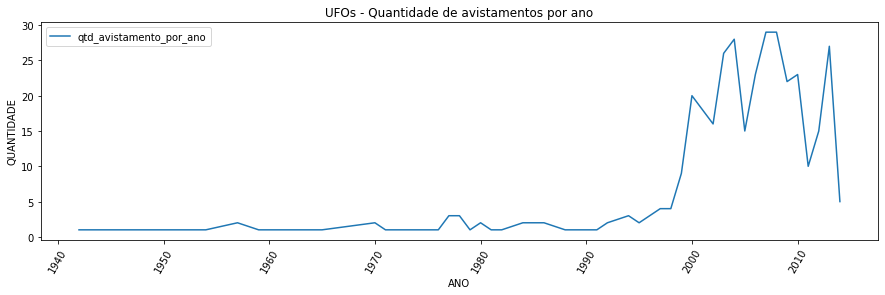

In [24]:
fig = df_year.plot(title='UFOs - Quantidade de avistamentos por ano', rot=60, figsize=(15,4))
fig.set_xlabel('ANO')
fig.set_ylabel('QUANTIDADE')

### A partir de 2000

In [25]:
# limitando o df a partir do ano 2000, que possui maior quantidade de avistamentos

df_2000 = df_max.loc[(df['date'].dt.year >= 2000)]

In [26]:
# agrupando o df por anos a partir de 2000 e contando os avistamentos

df_2000 = df_2000.groupby([df['date'].dt.year])['date'].count().to_frame()
df_2000 = df_2000.rename(columns={'date': 'qtd_avistamento_por_ano'})
df_2000.head()

,qtd_avistamento_por_ano
date,
2000,20
2001,18
2002,16
2003,26
2004,28


Text(0, 0.5, 'QUANTIDADE')

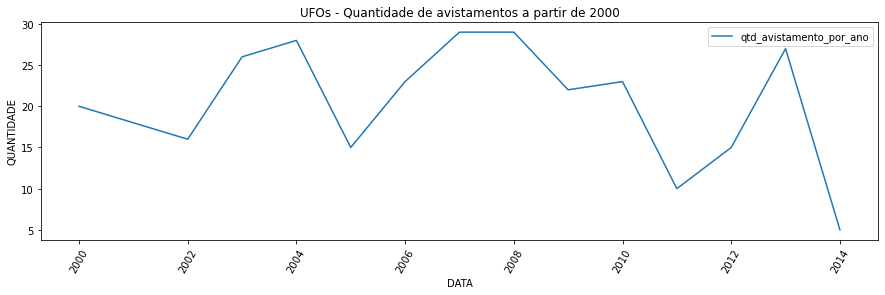

In [27]:
fig = df_2000.plot(title='UFOs - Quantidade de avistamentos a partir de 2000', rot=60, figsize=(15,4))
fig.set_xlabel('DATA')
fig.set_ylabel('QUANTIDADE')

# Analisando o formato dos avistamentos em LA

In [28]:
df_shapes = df_max[['shape']]
df_shapes

,shape
120,oval
271,light
308,rectangle
356,triangle
697,formation
...,...
69898,oval
70043,oval
70743,light
70955,light


In [29]:
# contando a quantidade de formatos avistados
shapes = df_shapes.value_counts()
shapes

shape    
light        66
unknown      49
circle       40
triangle     32
disk         31
fireball     29
sphere       25
oval         22
cigar        17
changing     15
formation    11
chevron       6
flash         5
rectangle     5
diamond       4
cone          4
teardrop      4
cylinder      1
dtype: int64

In [30]:
# transformando a contagem em porcentagem

shapes_pct = ((shapes/len(df_shapes))*100)
shapes_pct

shape    
light        18.032787
unknown      13.387978
circle       10.928962
triangle      8.743169
disk          8.469945
fireball      7.923497
sphere        6.830601
oval          6.010929
cigar         4.644809
changing      4.098361
formation     3.005464
chevron       1.639344
flash         1.366120
rectangle     1.366120
diamond       1.092896
cone          1.092896
teardrop      1.092896
cylinder      0.273224
dtype: float64

Text(0, 0.5, 'PORCENTAGEM DE AVISTAMENTOS')

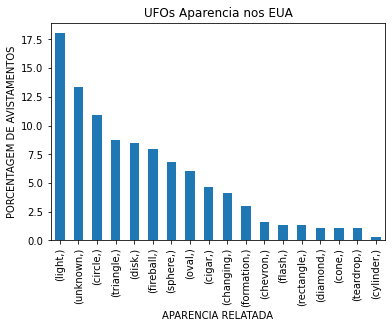

In [31]:
fig = shapes_pct.plot(kind='bar', title='UFOs Aparencia nos EUA')
fig.set_xlabel('APARENCIA RELATADA')
fig.set_ylabel('PORCENTAGEM DE AVISTAMENTOS')

# Tempo médio de avistamento em LA

In [32]:
df_duration = df_max[['duration_m']]
df_duration.head()

,duration_m
120,0.166667
271,5.000000
308,0.333333
356,0.500000
697,25.000000


In [33]:
# calculando o tempo médio por avistamentos

duration_mean = df_duration['duration_m'].mean()
duration_mean

12.236338797814213